# Mnist Fashion With Tensorflow 2.0

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(x_train)

255

In [9]:
np.mean(x_train)

72.94035223214286

## Labels of training images

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['t-shirt','trouser','pullover','dress','coar','sandal','shirt', 'sneaker', 'bag', 'ankle boot']

## Data Exploration

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

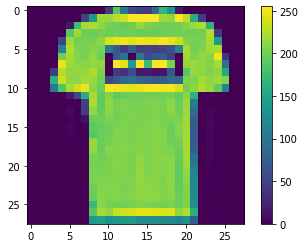

In [14]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
x_train=x_train/255.0

In [17]:
x_test=x_test/255.0

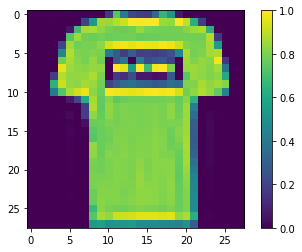

In [18]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

## Model with TF 2.0

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [20]:
model = Sequential()
model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model compilation
 - loss function
 - optimizer
 - metrics

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training

In [23]:
history=model.fit(x_train, y_train, epochs=10, batch_size=10,validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.4990 - accuracy: 0.8219 - val_loss: 0.4089 - val_accuracy: 0.8547
Epoch 2/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.3796 - accuracy: 0.8619 - val_loss: 0.3869 - val_accuracy: 0.8566
Epoch 3/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.3380 - accuracy: 0.8752 - val_loss: 0.3900 - val_accuracy: 0.8610
Epoch 4/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.3134 - accuracy: 0.8836 - val_loss: 0.3659 - val_accuracy: 0.8684
Epoch 5/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.2977 - accuracy: 0.8897 - val_loss: 0.3458 - val_accuracy: 0.8758
Epoch 6/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.2811 - accuracy: 0.8964 - val_loss: 0.3431 - val_accuracy: 0.8780
Epoch 7/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.2676 - accuracy: 0.9005 - val_loss: 0.3359 - val_accuracy:

In [24]:
print(history.history)

{'loss': [0.4990253150463104, 0.3796147406101227, 0.3379514217376709, 0.31335580348968506, 0.29768067598342896, 0.28106051683425903, 0.26763543486595154, 0.2589522898197174, 0.24808380007743835, 0.2406863421201706], 'accuracy': [0.8219166398048401, 0.8618749976158142, 0.875249981880188, 0.8835625052452087, 0.8897083401679993, 0.8964166641235352, 0.9005208611488342, 0.9027291536331177, 0.9079791903495789, 0.9089583158493042], 'val_loss': [0.4088827669620514, 0.3869208097457886, 0.39002981781959534, 0.3659385144710541, 0.3458492159843445, 0.3430746793746948, 0.3359476923942566, 0.3331546187400818, 0.35714179277420044, 0.35495051741600037], 'val_accuracy': [0.8546666502952576, 0.8565833568572998, 0.8610000014305115, 0.8684166669845581, 0.8757500052452087, 0.878000020980835, 0.8844166398048401, 0.8866666555404663, 0.8824999928474426, 0.8742499947547913]}


In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8731


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
accuracy_score(y_test,y_pred)

0.8731

## Inference

In [29]:
pred = model.predict(x_test)
print(pred)

[[2.3792235e-10 8.7721020e-13 6.3529382e-14 ... 5.7869148e-03
  1.2185243e-09 9.9400216e-01]
 [3.9705297e-05 9.3315973e-14 9.9819118e-01 ... 1.7153626e-23
  8.3915973e-12 1.8564334e-16]
 [1.1013884e-10 1.0000000e+00 7.6747351e-14 ... 3.7406682e-36
  1.9243525e-17 2.3795353e-30]
 ...
 [9.2581377e-06 1.3168457e-11 2.4958442e-06 ... 4.1018070e-15
  9.9984086e-01 1.1703514e-15]
 [3.2995292e-08 9.9992096e-01 4.3564127e-10 ... 2.5879095e-19
  1.4624274e-11 9.1447244e-16]
 [7.4221243e-06 1.0377918e-08 7.3625074e-07 ... 5.1802727e-03
  7.0328286e-05 5.3631673e-05]]


In [30]:
pred[5]

array([2.4143878e-07, 9.9999976e-01, 9.4793828e-10, 1.9557614e-08,
       2.1653253e-09, 1.6230210e-18, 1.3667870e-09, 2.7389796e-26,
       2.5143134e-13, 1.1357022e-21], dtype=float32)

coar


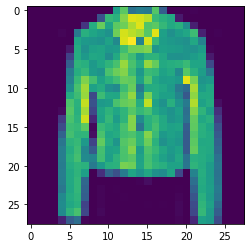

In [31]:
plt.imshow(x_test[10])
print(class_names[np.argmax(pred[10])])

## Saving the Model

In [32]:
model.save("mnist_fashion.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_fashion.model/assets


## Plots and Confusion matrix

In [33]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()

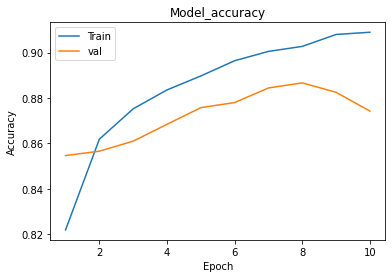

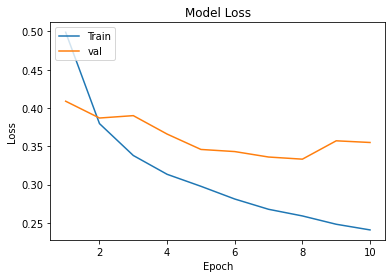

In [34]:
plot_learningCurve(history,10)

In [53]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

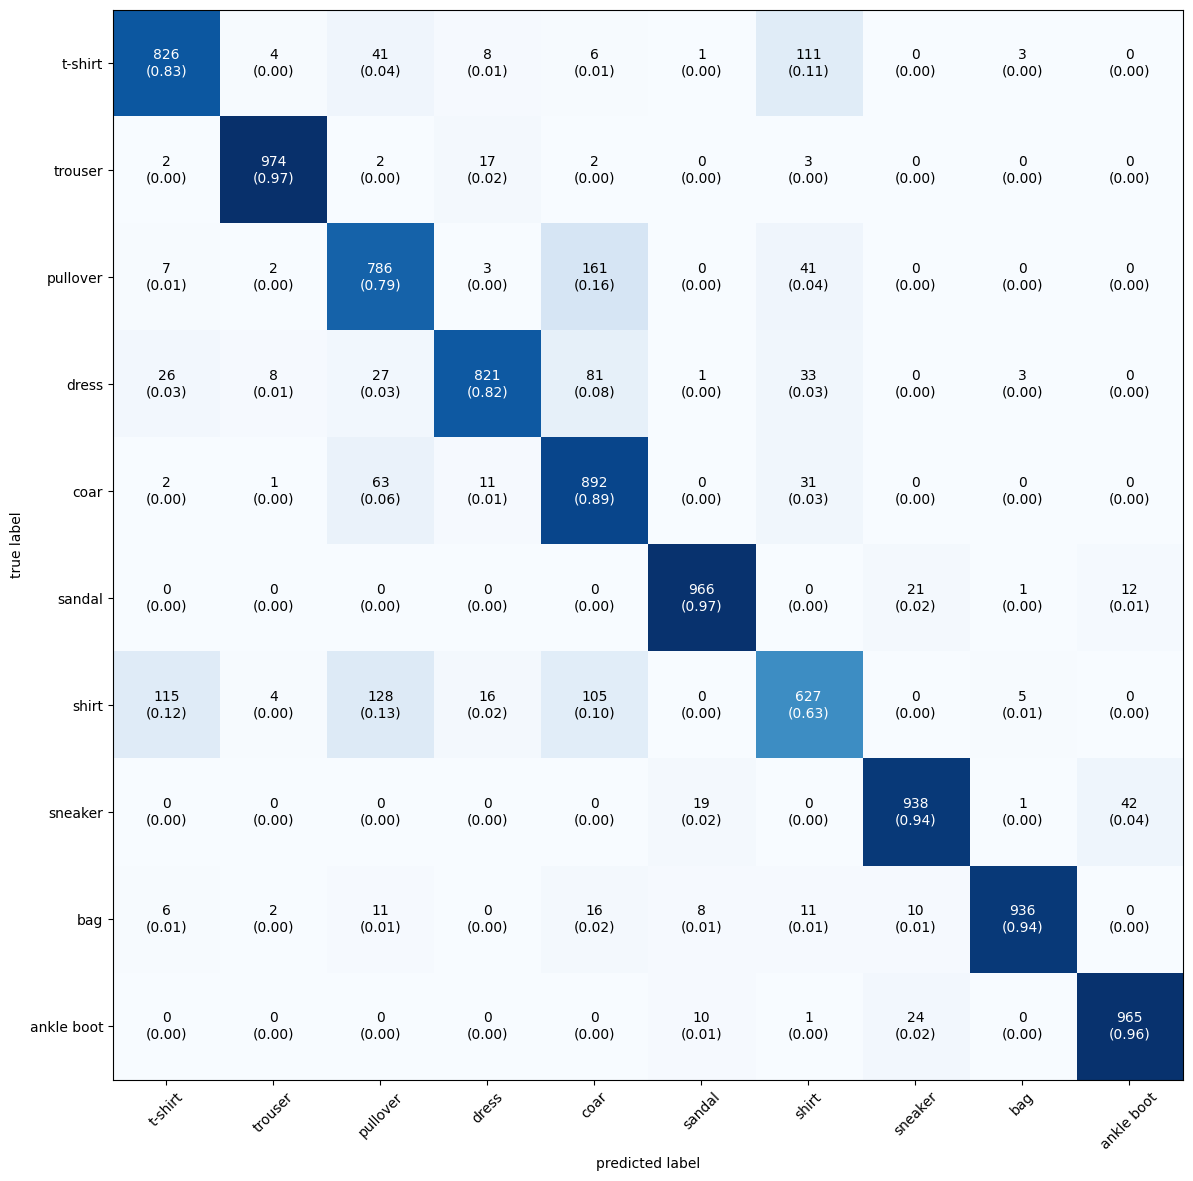

In [55]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(12,12), class_names=class_names, show_normed=True)
plt.tight_layout()
fig.savefig('cm.png')